In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
data = pd.read_csv('netflix.csv')

In [3]:
#checking any null values and data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data Cleaning

In [5]:
#lets fill duration and rating null values 
data[data['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [6]:
#rating and duration columns are replaced in this 3 rows 
data.loc[[5541,5794,5813],'duration']=data.loc[[5541,5794,5813],'rating']

In [7]:
#rating of these 3 rows just filling the rating seeing the genre and description
data.loc[[5541,5794,5813],'rating']=['TV-14','TV-14','TV-14']

In [8]:
#rating null rows
data[data['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [9]:
#filling rating according to sources or by genre and description
data.loc[data[data['rating'].isnull()].index.tolist(),'rating']=['TV-14','TV-14','TV-Y','TV-MA']

In [10]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
data[data['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [12]:
#date added by netflix is taken from sources
data.loc[data[data['date_added'].isnull()].index.tolist(),'date_added']=['December 20, 2015', 'June 1, 2020' ,'March 4, 2011' ,'January 1, 2015', 'January 4, 2016', 'July 6, 2017', 'June 1, 2015', 'February 26, 2020', 'May 21, 2016', 'January 1, 2016']

In [13]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
#creating dictionary of directors their country to fill the country column nulls
datap=data.copy()
datap['director']=datap['director'].str.split(', ')
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('director',ignore_index=True)
datap=datap.explode('country',ignore_index=True)

k=0
dir_dic={}
for i in datap['director']:
    if i in dir_dic:
        k+=1
        continue
    else:
        if i is not np.nan:
            if datap.loc[k,'country'] is not np.nan:
                dir_dic[i]=datap.loc[k,'country']
    k+=1

In [15]:
# Assigning same country to director movie or tvshow
k=0
for i in data['country']:
    if i is np.nan:
        if data.loc[k,'director'] is not np.nan:
            l=data.loc[k,'director'].split(', ')
            for j in l:
                if j in dir_dic:
                    data.loc[k,'country']=dir_dic.get(j)
        
    k+=1

In [16]:
#creating dictionary of cast their country to fill the country column nulls

datap=data.copy()
datap['cast']=datap['cast'].str.split(', ')
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('cast',ignore_index=True)
datap=datap.explode('country',ignore_index=True)

k=0
cast_dic={}
for i in datap['cast']:
    if i in cast_dic:
        k+=1
        continue
    else:
        if i is not np.nan:
            if datap.loc[k,'country'] is not np.nan:
                cast_dic[i]=datap.loc[k,'country']
    k+=1

In [17]:
# Assigning same country to same cast movie or tvshow
k=0
for i in data['country']:
    if i is np.nan:
        if data.loc[k,'cast'] is not np.nan:
            l=data.loc[k,'cast'].split(', ')
            for j in l:
                if j in cast_dic:
                    data.loc[k,'country']=cast_dic.get(j)
        
    k+=1

In [18]:
#creating month column from date_added
data['month_added']= (pd.to_datetime(data['date_added'])).dt.month_name()

In [19]:
#creating year column from date_added
data['year_added']= (pd.to_datetime(data['date_added'])).dt.year

In [20]:
#creating day_name column from date added
data['day_added']=(pd.to_datetime(data['date_added'])).dt.day_name()

### Dividing dataset with their type[Movie/TV Show]

Since there are many null for TV Show directors for comfort we divided

In [21]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [22]:
movies_data=data[data['type']=='Movie'].copy()
tvshow_data=data[data['type']=='TV Show'].copy()

In [23]:
movies_data.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country          92
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
month_added       0
year_added        0
day_added         0
dtype: int64

In [24]:
#movies have null values for director, cast and country they are very less so lets drop all
movies_data.dropna(inplace=True)

In [25]:
tvshow_data.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          155
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
month_added        0
year_added         0
day_added          0
dtype: int64

In [26]:
#TV shows we are having many null for director almost 90% so lets drop the director column and we are dropping cast,country null values
tvshow_data.drop(columns='director',axis=1,inplace=True)

In [27]:
tvshow_data.dropna(inplace=True)

In [28]:
movies_data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
day_added       0
dtype: int64

In [29]:
tvshow_data.isna().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
day_added       0
dtype: int64

In [30]:
#exploration on directors column can be done from movies_data so here we are creating no null data for combined movies and Tv show
nonull_data=data.drop(columns='director',axis=1)

In [31]:
nonull_data.dropna(inplace=True)

In [32]:
#movies_data = data of type movies with no null
#tvshow_data = data of type tvshow with no null and no director column
#nonull_data = data of netflix with no null and no director column

## EDA

### There are only 2 major types in Netflix watch: Movies and TV Show

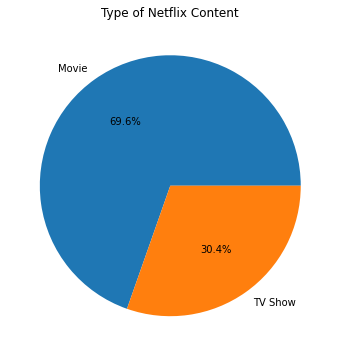

In [33]:
plt.figure(figsize=(6,6))
plt.pie(data['type'].value_counts(),labels=data['type'].unique(),autopct='%1.1f%%')
plt.title('Type of Netflix Content')
plt.show()

- More than 2/3 rd of the content are movies in Netflix

### The trend in movies and Tv shows released by year

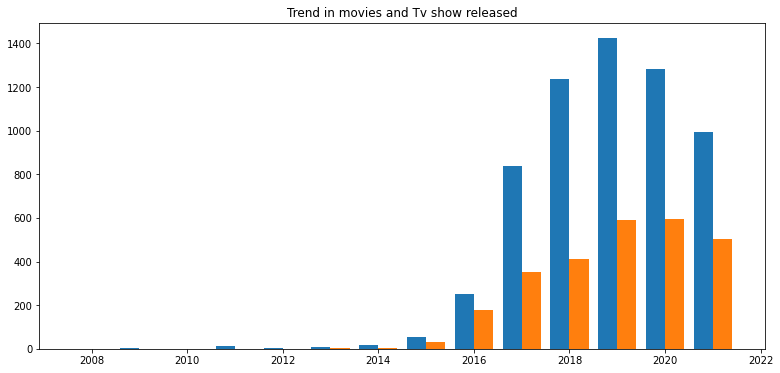

In [34]:
plt.figure(figsize=(13,6))
plt.bar(x=data.loc[data['type']=='Movie','year_added'].value_counts().index ,height=data.loc[data['type']=='Movie','year_added'].value_counts(),width=-0.4,align='edge')
plt.bar(x=data.loc[data['type']=='TV Show','year_added'].value_counts().index ,height=data.loc[data['type']=='TV Show','year_added'].value_counts(),width=0.4,align='edge')
plt.title('Trend in movies and Tv show released')
plt.show()

- In 2019 more content released and after that there is decrease in movie content it may due to covid situation.

- But in case of TV Show the content released in 2019 and 2020 is almost equal 

### Content released by months

[]

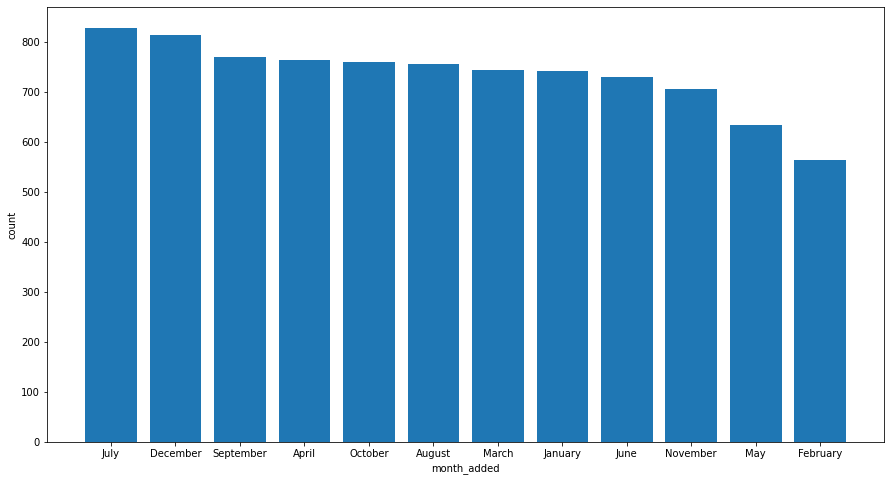

In [35]:
plt.figure(figsize=(15,8))
plt.bar(x=data['month_added'].value_counts().index, height=data['month_added'].value_counts())
plt.xlabel('month_added')
plt.ylabel('count')
plt.plot()

### Number of Movies and Tv show released by months

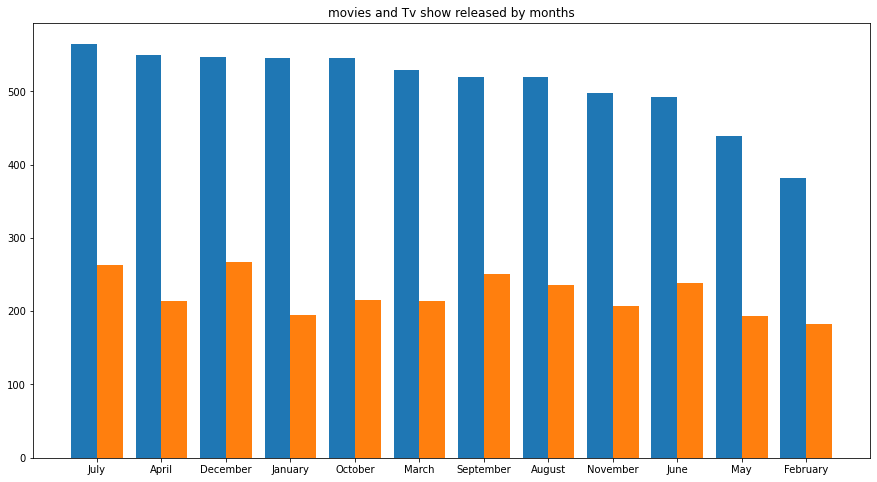

In [36]:
plt.figure(figsize=(15,8))
plt.bar(x=data.loc[data['type']=='Movie','month_added'].value_counts().index ,height=data.loc[data['type']=='Movie','month_added'].value_counts(),width=-0.4,align='edge')
plt.bar(x=data.loc[data['type']=='TV Show','month_added'].value_counts().index ,height=data.loc[data['type']=='TV Show','month_added'].value_counts(),width=0.4,align='edge')
plt.title('movies and Tv show released by months')
plt.show()

- Highest no of movies released in july month and highest no of TV show released in july month

### Number of Movies and Tv show released by day

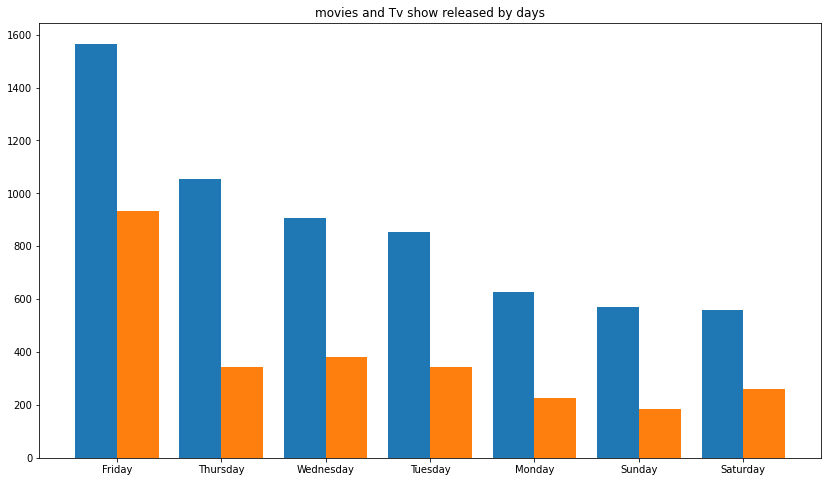

In [37]:
plt.figure(figsize=(14,8))
plt.bar(x=data.loc[data['type']=='Movie','day_added'].value_counts().index ,height=data.loc[data['type']=='Movie','day_added'].value_counts(),width=-0.4,align='edge')
plt.bar(x=data.loc[data['type']=='TV Show','day_added'].value_counts().index ,height=data.loc[data['type']=='TV Show','day_added'].value_counts(),width=0.4,align='edge')
plt.title('movies and Tv show released by days')
plt.show()

- most of the content is releasing on friday

- #### The best time to release Movie or Tv Show is in december or july any friday 

### Top 10 Movie and TV Show released by countries

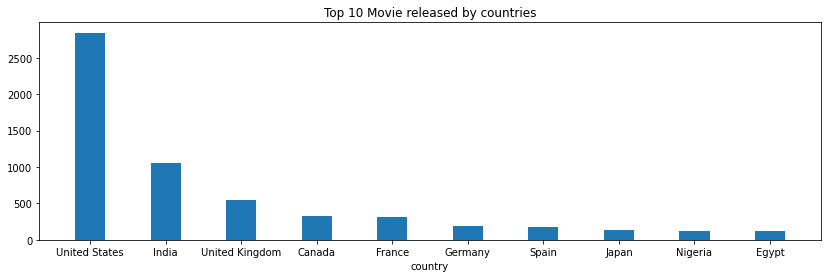

In [38]:
datap=data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')
plt.figure(figsize=(14,4))
plt.bar(x=datap.loc[datap['type']=='Movie','country'].value_counts().index[0:10] ,height=datap.loc[datap['type']=='Movie','country'].value_counts()[0:10],width=-0.4)
plt.title('Top 10 Movie released by countries')
plt.xlabel('country')
plt.show()

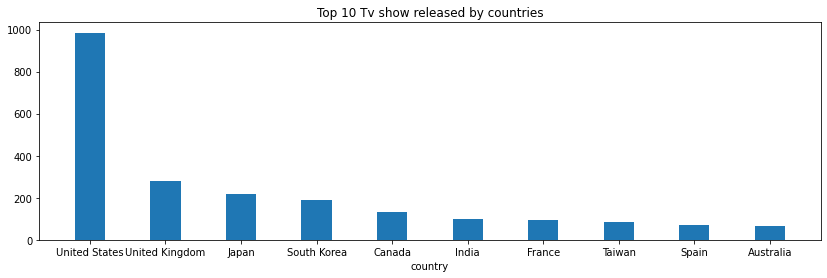

In [64]:
datap=data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')
plt.figure(figsize=(14,4))
plt.bar(x=datap.loc[datap['type']=='TV Show','country'].value_counts().index[0:10] ,height=datap.loc[datap['type']=='TV Show','country'].value_counts()[0:10],width=0.4)
plt.title('Top 10 Tv show released by countries')
plt.xlabel('country')
plt.show()

### Movies duration distribution

In [40]:
movies_data['duration']=movies_data['duration'].str.split(' ').apply(lambda x: x[0])
movies_data['duration']=movies_data['duration'].astype(int)

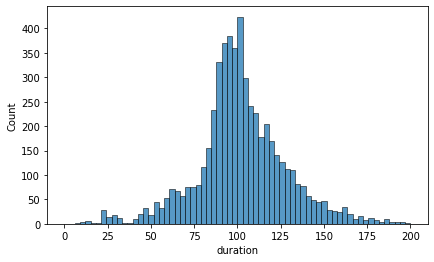

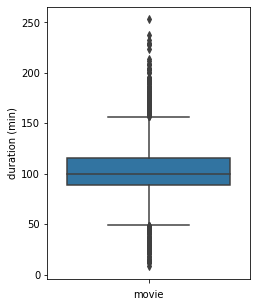

In [41]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.histplot(data=movies_data,x='duration',binrange=(0,200))
plt.show()

plt.figure(figsize=(8,5))
plt.subplot(1,2,2)
sns.boxplot(data=movies_data,y='duration')
plt.xlabel('movie')
plt.ylabel('duration (min)')
plt.show()

- Most of the movies are in the range 90-115 minutes

### TV Show with no of seasons

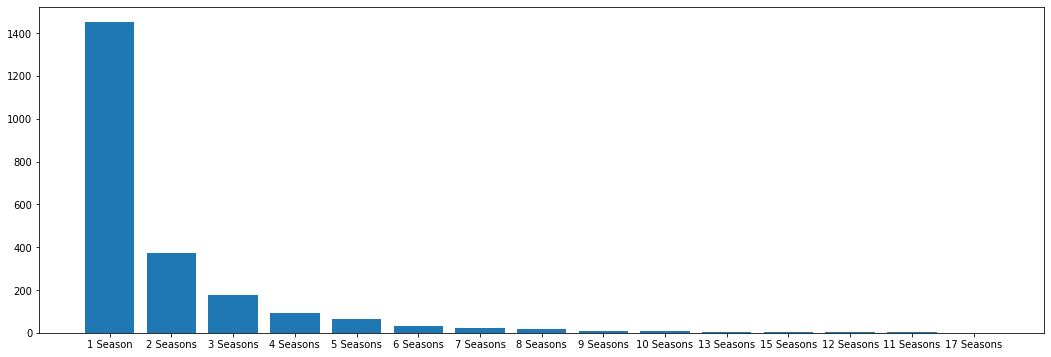

In [42]:
plt.figure(figsize=(18,6))
plt.bar(x=tvshow_data['duration'].value_counts().index,height=tvshow_data['duration'].value_counts().values)
plt.show()

- Mostly there are only one season Tv shows

### TV show with more than 9 seasons

In [43]:
tvshow_data['duration']=tvshow_data['duration'].str.split(' ').apply(lambda x: x[0])
tvshow_data['duration']=tvshow_data['duration'].astype(int)

In [44]:
pd.DataFrame(tvshow_data[tvshow_data['duration']>9][['title','duration','listed_in','release_year','date_added']])

,title,duration,listed_in,release_year,date_added
390,The Walking Dead,10,"Classic & Cult TV, TV Action & Adventure, TV D...",2019,"July 26, 2021"
548,Grey's Anatomy,17,"Romantic TV Shows, TV Dramas",2020,"July 3, 2021"
1354,Heartland,13,TV Dramas,2019,"February 1, 2021"
1622,Stargate SG-1,10,"Classic & Cult TV, TV Action & Adventure, TV S...",2006,"December 1, 2020"
1759,LEGO Ninjago: Masters of Spinjitzu,10,Kids' TV,2019,"November 1, 2020"
2203,Shameless (U.S.),10,"TV Comedies, TV Dramas",2019,"July 26, 2020"
2423,Supernatural,15,"Classic & Cult TV, TV Action & Adventure, TV H...",2019,"June 5, 2020"
4220,COMEDIANS of the world,13,"Stand-Up Comedy & Talk Shows, TV Comedies",2019,"January 1, 2019"
4798,NCIS,15,"Crime TV Shows, TV Dramas, TV Mysteries",2017,"July 1, 2018"
4964,Trailer Park Boys,12,"Classic & Cult TV, Crime TV Shows, Internation...",2018,"March 30, 2018"


- **Recommendation:** Try to produce new seasons for the well-established TV Show that are produced many seasons.

### Number of Movies on Netflix released before 1990

[]

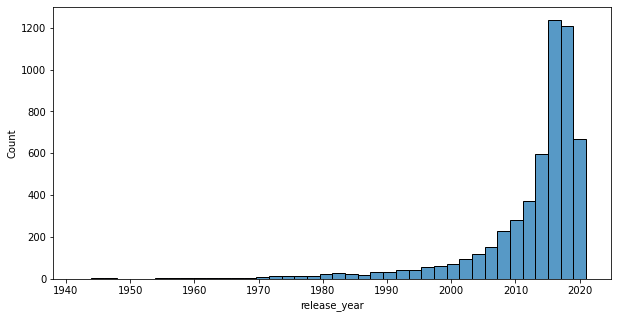

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(data=movies_data,x='release_year',bins=40)
plt.plot()

In [46]:
movies_data[movies_data['release_year']<1990]['release_year'].value_counts().sum()

223

- **Recommendation:** Only 223 movies are there which are released before 1990. If we try to keep more old classics we may attract people from that generation.

### Director with more movies in one genre

In [47]:
feb=movies_data.copy()
feb['director']=feb['director'].str.split(', ')
feb['listed_in']=feb['listed_in'].str.split(', ')
feb=feb.explode('listed_in')
feb=feb.explode('director')
feb.drop(index=feb[feb['listed_in']=='International Movies'].index,axis=0,inplace=True)
feb.drop(index=feb[feb['listed_in']=='Stand-Up Comedy'].index,axis=0,inplace=True)
a=pd.DataFrame(feb.groupby(['director','listed_in'])['type'].value_counts())
pd.DataFrame(a['type'].sort_values(ascending=False)[0:15])

,,,type
director,listed_in,type,
Rajiv Chilaka,Children & Family Movies,Movie,19
Suhas Kadav,Children & Family Movies,Movie,13
Martin Scorsese,Dramas,Movie,9
Don Michael Paul,Action & Adventure,Movie,9
Suhas Kadav,Comedies,Movie,8
Robert Rodriguez,Children & Family Movies,Movie,7
Steve Ball,Children & Family Movies,Movie,6
Steven Spielberg,Dramas,Movie,6
Lasse Hallström,Dramas,Movie,6


### Cast with more movies in one genre

In [48]:
#removing international movies and standup comedy from genre list
feb=movies_data.copy()
feb['cast']=feb['cast'].str.split(', ')
feb['listed_in']=feb['listed_in'].str.split(', ')
feb=feb.explode('listed_in')
feb=feb.explode('cast')
feb.drop(index=feb[feb['listed_in']=='International Movies'].index,axis=0,inplace=True)
feb.drop(index=feb[feb['listed_in']=='Stand-Up Comedy'].index,axis=0,inplace=True)
a=pd.DataFrame(feb.groupby(['cast','listed_in'])['type'].value_counts())
pd.DataFrame(a['type'].sort_values(ascending=False)[0:15])

,,,type
cast,listed_in,type,
Julie Tejwani,Children & Family Movies,Movie,26
Rupa Bhimani,Children & Family Movies,Movie,25
Rajesh Kava,Children & Family Movies,Movie,21
Jigna Bhardwaj,Children & Family Movies,Movie,19
Adam Sandler,Comedies,Movie,18
Vatsal Dubey,Children & Family Movies,Movie,16
Laura Bailey,Children & Family Movies,Movie,14
Tara Strong,Children & Family Movies,Movie,14
Maya Rudolph,Comedies,Movie,14


### Stand-Up Comedy top directors

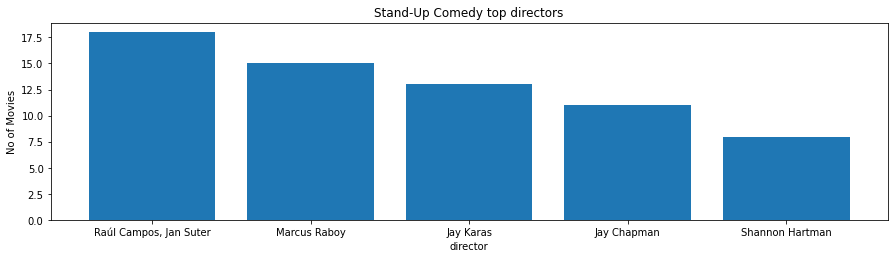

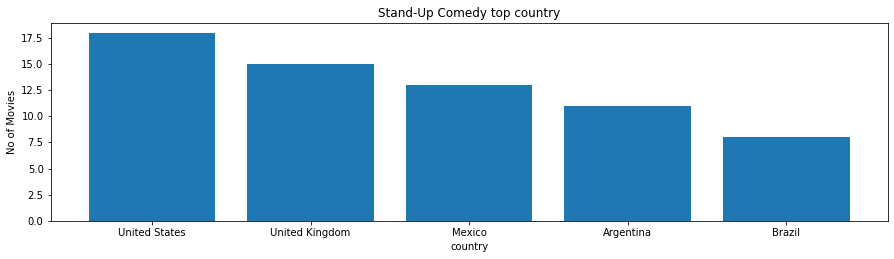

In [49]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.bar(x=movies_data[movies_data['listed_in']=='Stand-Up Comedy']['director'].value_counts()[0:5].index,height=movies_data[movies_data['listed_in']=='Stand-Up Comedy']['director'].value_counts()[0:5].values)
plt.xlabel('director')
plt.ylabel('No of Movies')
plt.title('Stand-Up Comedy top directors')
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(2,1,2)
plt.bar(x=movies_data[movies_data['listed_in']=='Stand-Up Comedy']['country'].value_counts()[0:5].index,height=movies_data[movies_data['listed_in']=='Stand-Up Comedy']['director'].value_counts()[0:5].values)
plt.xlabel('country')
plt.ylabel('No of Movies')
plt.title('Stand-Up Comedy top country')
plt.show()

### Top 3 director in every genre

In [50]:
feb=movies_data.copy()
feb['director']=feb['director'].str.split(', ')
feb['listed_in']=feb['listed_in'].str.split(', ')
feb=feb.explode('listed_in')
feb=feb.explode('director')
pd.DataFrame(feb.groupby('listed_in')['director'].apply(lambda x: x.value_counts()[0:3]))

director
listed_in                                                  
Action & Adventure       Don Michael Paul                 9
                         S.S. Rajamouli                   7
                         Toshiya Shinohara                7
Anime Features           Toshiya Shinohara                7
                         Masahiko Murata                  5
                         Yoshiyuki Tomino                 4
Children & Family Movies Rajiv Chilaka                   19
                         Suhas Kadav                     13
                         Robert Rodriguez                 7
Classic Movies           Youssef Chahine                  8
                         Steven Spielberg                 5
                         Martin Scorsese                  5
Comedies                 David Dhawan                     9
                         Suhas Kadav                      8
                         Hakan Algül                      8
Cult Movies              Mike Clattenburg                 3
                         Kevin Smith                      2
                         Alejandro Doria                  2
Documentaries            Thierry Donard                   5
                         Vlad Yudin                       4
                         Morgan Neville                   3
Dramas                   Youssef Chahine                 12
                         Martin Scorsese                  9
                         Cathy Garcia-Molina              9
Faith & Spirituality     David Batty                      5
                         Note Chern-Yim                   3
                         Alexandre Avancini               2
Horror Movies            Rocky Soraya                     6
                         Rathindran R Prasad              4
                         Poj Arnon                        4
Independent Movies       Noah Baumbach                    5
                         Paul Thomas Anderson             5
                         Qaushiq Mukherjee                4
International Movies     Cathy Garcia-Molina             13
                         Youssef Chahine                 10
                         Yılmaz Erdoğan                   9
LGBTQ Movies             Leigh Janiak                     2
                         Saratswadee Wongsomphet          2
                         Jun Lana                         2
Movies                   Louis C.K.                       3
                         Richard Bailey                   2
                         Mike Smith                       2
Music & Musicals         Matt Askem                       5
                         Suhas Kadav                      5
                         Paul Dugdale                     4
Romantic Movies          Cathy Garcia-Molina              8
                         Justin G. Dyck                   6
                         Roger Kumble                     4
Sci-Fi & Fantasy         Lana Wachowski                   4
                         Lilly Wachowski                  4
                         Guillermo del Toro               3
Sports Movies            Clay Glen                        3
                         Sylvester Stallone               3
                         Vlad Yudin                       2
Stand-Up Comedy          Jan Suter                       21
                         Raúl Campos                     19
                         Marcus Raboy                    15
Thrillers                David Fincher                    4
                         Rathindran R Prasad              4
                         Fernando González Molina         3

### Top 3 Cast in every genre

In [51]:
feb=movies_data.copy()
feb['cast']=feb['cast'].str.split(', ')
feb['listed_in']=feb['listed_in'].str.split(', ')
feb=feb.explode('listed_in')
feb=feb.explode('cast')
pd.DataFrame(feb.groupby('listed_in')['cast'].apply(lambda x: x.value_counts()[0:3]))

cast
listed_in                                         
Action & Adventure       Bruce Willis           13
                         Amitabh Bachchan       12
                         Anupam Kher            12
Anime Features           Yuki Kaji              10
                         Junko Takeuchi          9
                         Chie Nakamura           9
Children & Family Movies Julie Tejwani          26
                         Rupa Bhimani           25
                         Rajesh Kava            21
Classic Movies           Harvey Keitel           5
                         Robert De Niro          5
                         Harrison Ford           4
Comedies                 Anupam Kher            20
                         Adam Sandler           18
                         Paresh Rawal           18
Cult Movies              Patrick Roach           3
                         Robb Wells              3
                         John Paul Tremblay      3
Documentaries            Samuel West            10
                         Quincy Jones            5
                         Wille Lindberg          5
Dramas                   Shah Rukh Khan         28
                         Naseeruddin Shah       28
                         Anupam Kher            28
Faith & Spirituality     El Mahmoudi M'Barek     4
                         Selva Rasalingam        4
                         Ait Youssef Youssef     4
Horror Movies            Michael Gross           7
                         Tony Todd               5
                         Ashley Zukerman         4
Independent Movies       Naseeruddin Shah       10
                         Rajit Kapoor            8
                         Konkona Sen Sharma      7
International Movies     Anupam Kher            38
                         Shah Rukh Khan         32
                         Om Puri                27
LGBTQ Movies             Margaret Cho            3
                         Supanart Jittaleela     3
                         David Verdaguer         2
Movies                   Cassandra Morris        4
                         Kate Murphy             3
                         Louis C.K.              3
Music & Musicals         Anil Kapoor             7
                         Akshay Kumar            7
                         Gulshan Grover          7
Romantic Movies          Akshay Kumar            8
                         Salman Khan             7
                         Anupam Kher             7
Sci-Fi & Fantasy         Paul Bettany            6
                         Nicolas Cage            6
                         Fred Tatasciore         6
Sports Movies            Burt Young              5
                         Sylvester Stallone      4
                         Talia Shire             4
Stand-Up Comedy          Jeff Dunham             8
                         Kevin Hart              7
                         Jim Gaffigan            5
Thrillers                Ben Kingsley            7
                         Nawazuddin Siddiqui     7
                         Nicolas Cage            7

### Top Countries content released Analysis of top Director, Cast, Genre, Rating

### Movies

### 1.United States

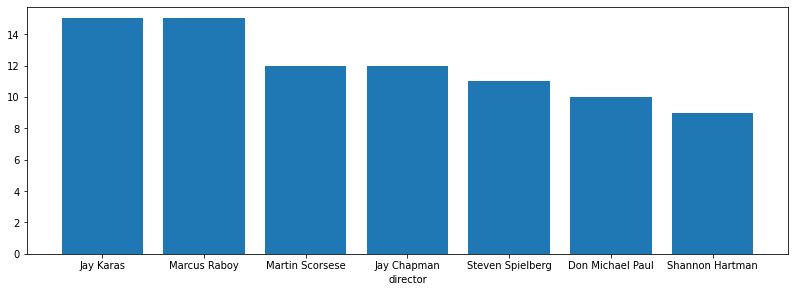

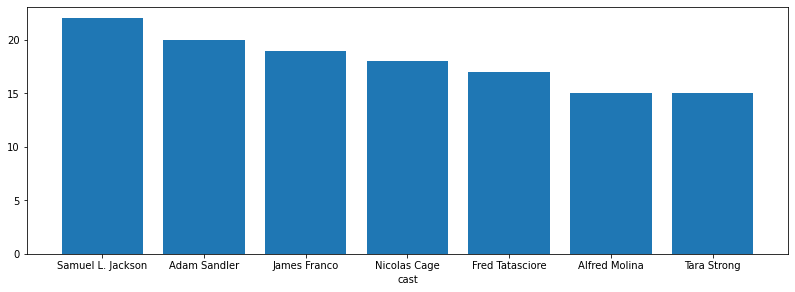

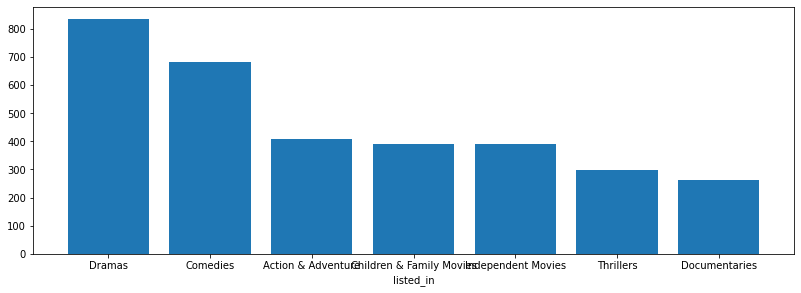

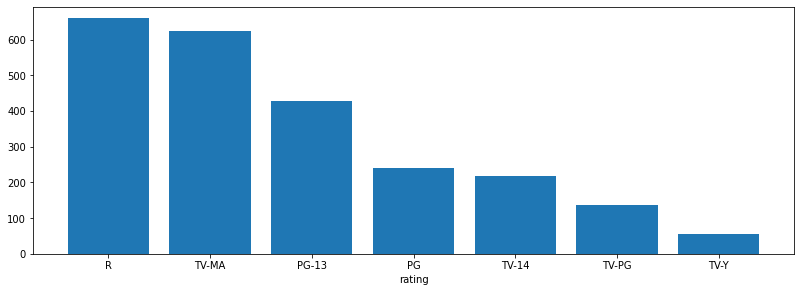

In [52]:
datap=movies_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

datap=datap[datap['country']=='United States'].copy()
datap['director']=datap['director'].str.split(', ')
datap['cast']=datap['cast'].str.split(', ')
datap['listed_in']=datap['listed_in'].str.split(', ')
l=['director','cast','listed_in']
k=1

for i in l:
    plt.figure(figsize=(30,10))
    plt.subplot(2,2,k)
    plt.bar(x=datap.explode(i)[i].value_counts()[0:7].index,height=datap.explode(i)[i].value_counts()[0:7].values)
    plt.xlabel(i)
    plt.show()
    k+=1
    
plt.figure(figsize=(30,10))
plt.subplot(2,2,4)
plt.bar(x=datap['rating'].value_counts()[0:7].index,height=datap['rating'].value_counts()[0:7].values)
plt.xlabel('rating')
plt.show()

In [53]:
datap=movies_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

usa=datap[datap['country']=='United States']

usal,usad,usac=usa.copy(),usa.copy(),usa.copy()
usal['listed_in']=usal['listed_in'].str.split(', ')
usad['director']=usad['director'].str.split(', ')
usac['cast']=usac['cast'].str.split(', ')

m1d={'list':['director']*5,
     'United States Top 5':usad.explode('director')['director'].value_counts()[0:5].index,
     'count':usad.explode('director')['director'].value_counts()[0:5].values}
m1c={'list':['cast']*5,
     'United States Top 5':usac.explode('cast')['cast'].value_counts()[0:5].index,
     'count':usac.explode('cast')['cast'].value_counts()[0:5].values}
m1g={'list':['genre']*5,
     'United States Top 5':usal.explode('listed_in')['listed_in'].value_counts()[0:5].index,
     'count':usal.explode('listed_in')['listed_in'].value_counts()[0:5].values}
m1r={'list':['rating']*5,
     'United States Top 5':usa['rating'].value_counts()[0:5].index,
     'count':usa['rating'].value_counts()[0:5].values}

dfd,dfc,dfg,dfr=pd.DataFrame(m1d),pd.DataFrame(m1c),pd.DataFrame(m1g),pd.DataFrame(m1r)
df=pd.concat([dfd,dfc,dfg,dfr],axis=0)
k=df.groupby(['list','United States Top 5'],sort=False)
k.first()

count
list     United States Top 5            
director Jay Karas                    15
         Marcus Raboy                 15
         Martin Scorsese              12
         Jay Chapman                  12
         Steven Spielberg             11
cast     Samuel L. Jackson            22
         Adam Sandler                 20
         James Franco                 19
         Nicolas Cage                 18
         Fred Tatasciore              17
genre    Dramas                      836
         Comedies                    681
         Action & Adventure          408
         Children & Family Movies    391
         Independent Movies          390
rating   R                           659
         TV-MA                       625
         PG-13                       429
         PG                          241
         TV-14                       217

### 2.India

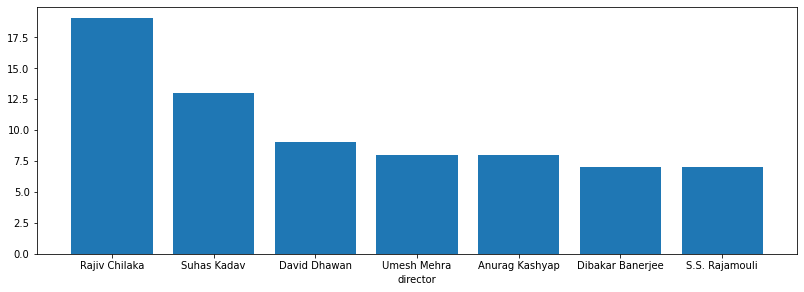

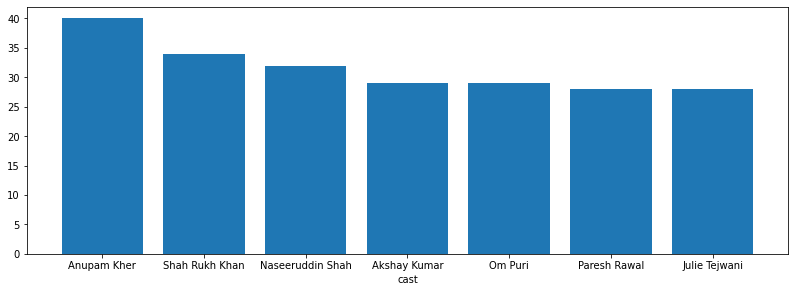

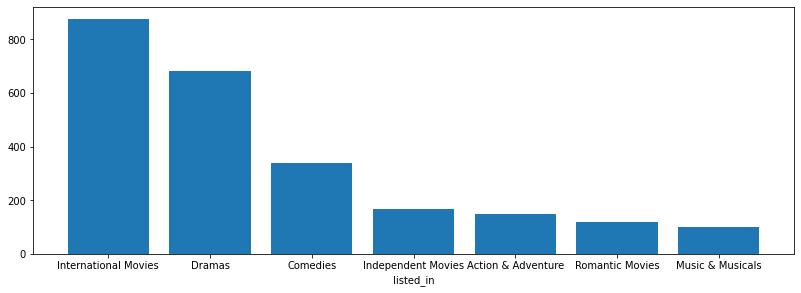

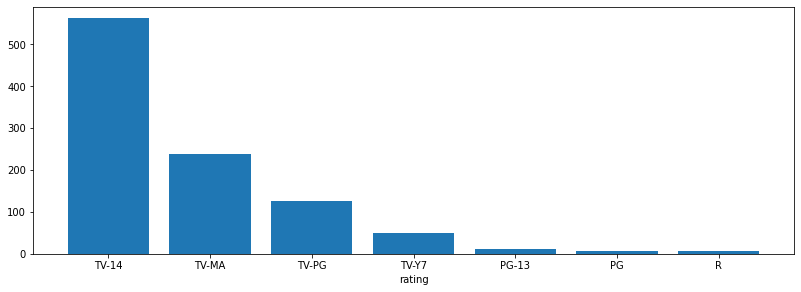

In [54]:
datap=movies_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

datap=datap[datap['country']=='India'].copy()
datap['director']=datap['director'].str.split(', ')
datap['cast']=datap['cast'].str.split(', ')
datap['listed_in']=datap['listed_in'].str.split(', ')
l=['director','cast','listed_in']
k=1

for i in l:
    plt.figure(figsize=(30,10))
    plt.subplot(2,2,k)
    plt.bar(x=datap.explode(i)[i].value_counts()[0:7].index,height=datap.explode(i)[i].value_counts()[0:7].values)
    plt.xlabel(i)
    plt.show()
    k+=1
    
plt.figure(figsize=(30,10))
plt.subplot(2,2,4)
plt.bar(x=datap['rating'].value_counts()[0:7].index,height=datap['rating'].value_counts()[0:7].values)
plt.xlabel('rating')
plt.show()

In [55]:
datap=movies_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

usa=datap[datap['country']=='India']

usal,usad,usac=usa.copy(),usa.copy(),usa.copy()
usal['listed_in']=usal['listed_in'].str.split(', ')
usad['director']=usad['director'].str.split(', ')
usac['cast']=usac['cast'].str.split(', ')

m1d={'list':['director']*5,
     'India Top 5':usad.explode('director')['director'].value_counts()[0:5].index,
     'count':usad.explode('director')['director'].value_counts()[0:5].values}
m1c={'list':['cast']*5,
     'India Top 5':usac.explode('cast')['cast'].value_counts()[0:5].index,
     'count':usac.explode('cast')['cast'].value_counts()[0:5].values}
m1g={'list':['genre']*5,
     'India Top 5':usal.explode('listed_in')['listed_in'].value_counts()[0:5].index,
     'count':usal.explode('listed_in')['listed_in'].value_counts()[0:5].values}
m1r={'list':['rating']*5,
     'India Top 5':usa['rating'].value_counts()[0:5].index,
     'count':usa['rating'].value_counts()[0:5].values}

dfd,dfc,dfg,dfr=pd.DataFrame(m1d),pd.DataFrame(m1c),pd.DataFrame(m1g),pd.DataFrame(m1r)
df=pd.concat([dfd,dfc,dfg,dfr],axis=0)
k=df.groupby(['list','India Top 5'],sort=False)
k.first()

count
list     India Top 5                
director Rajiv Chilaka            19
         Suhas Kadav              13
         David Dhawan              9
         Umesh Mehra               8
         Anurag Kashyap            8
cast     Anupam Kher              40
         Shah Rukh Khan           34
         Naseeruddin Shah         32
         Akshay Kumar             29
         Om Puri                  29
genre    International Movies    877
         Dramas                  682
         Comedies                339
         Independent Movies      168
         Action & Adventure      149
rating   TV-14                   561
         TV-MA                   237
         TV-PG                   127
         TV-Y7                    50
         PG-13                    11

### 3.United Kingdom

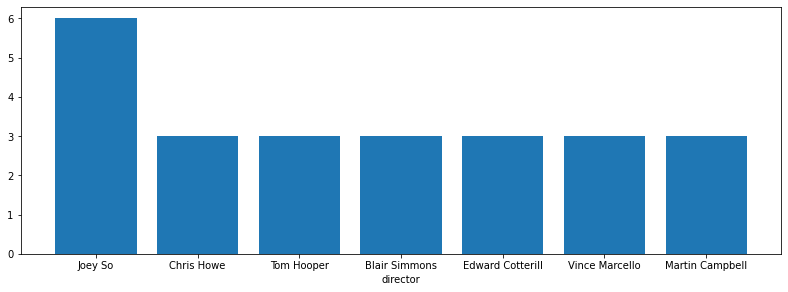

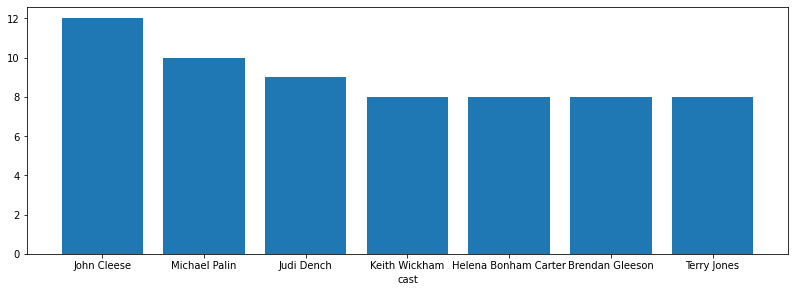

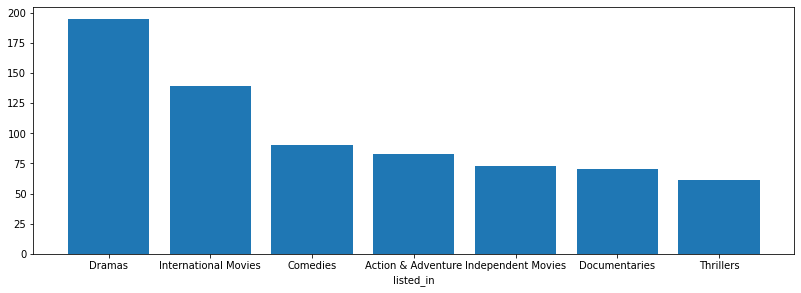

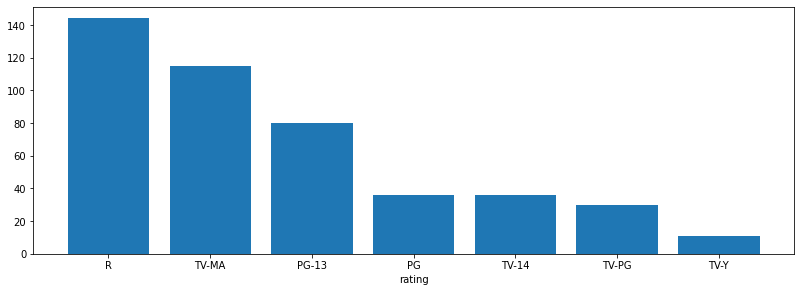

In [56]:
datap=movies_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

datap=datap[datap['country']=='United Kingdom'].copy()
datap['director']=datap['director'].str.split(', ')
datap['cast']=datap['cast'].str.split(', ')
datap['listed_in']=datap['listed_in'].str.split(', ')
l=['director','cast','listed_in']
k=1

for i in l:
    plt.figure(figsize=(30,10))
    plt.subplot(2,2,k)
    plt.bar(x=datap.explode(i)[i].value_counts()[0:7].index,height=datap.explode(i)[i].value_counts()[0:7].values)
    plt.xlabel(i)
    plt.show()
    k+=1
    
plt.figure(figsize=(30,10))
plt.subplot(2,2,4)
plt.bar(x=datap['rating'].value_counts()[0:7].index,height=datap['rating'].value_counts()[0:7].values)
plt.xlabel('rating')
plt.show()

In [57]:
datap=movies_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

usa=datap[datap['country']=='United Kingdom']

usal,usad,usac=usa.copy(),usa.copy(),usa.copy()
usal['listed_in']=usal['listed_in'].str.split(', ')
usad['director']=usad['director'].str.split(', ')
usac['cast']=usac['cast'].str.split(', ')

m1d={'list':['director']*5,
     'United Kingdom Top 5':usad.explode('director')['director'].value_counts()[0:5].index,
     'count':usad.explode('director')['director'].value_counts()[0:5].values}
m1c={'list':['cast']*5,
     'United Kingdom Top 5':usac.explode('cast')['cast'].value_counts()[0:5].index,
     'count':usac.explode('cast')['cast'].value_counts()[0:5].values}
m1g={'list':['genre']*5,
     'United Kingdom Top 5':usal.explode('listed_in')['listed_in'].value_counts()[0:5].index,
     'count':usal.explode('listed_in')['listed_in'].value_counts()[0:5].values}
m1r={'list':['rating']*5,
     'United Kingdom Top 5':usa['rating'].value_counts()[0:5].index,
     'count':usa['rating'].value_counts()[0:5].values}

dfd,dfc,dfg,dfr=pd.DataFrame(m1d),pd.DataFrame(m1c),pd.DataFrame(m1g),pd.DataFrame(m1r)
df=pd.concat([dfd,dfc,dfg,dfr],axis=0)
k=df.groupby(['list','United Kingdom Top 5'],sort=False)
k.first()

count
list     United Kingdom Top 5       
director Joey So                   6
         Chris Howe                3
         Tom Hooper                3
         Blair Simmons             3
         Edward Cotterill          3
cast     John Cleese              12
         Michael Palin            10
         Judi Dench                9
         Keith Wickham             8
         Helena Bonham Carter      8
genre    Dramas                  195
         International Movies    139
         Comedies                 90
         Action & Adventure       83
         Independent Movies       73
rating   R                       144
         TV-MA                   115
         PG-13                    80
         PG                       36
         TV-14                    36

### TV Show

### 1.United States

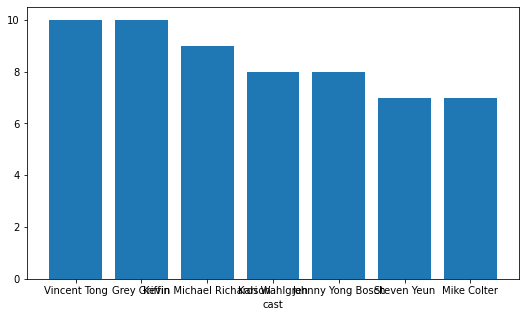

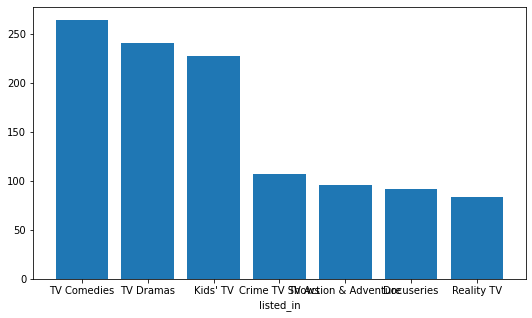

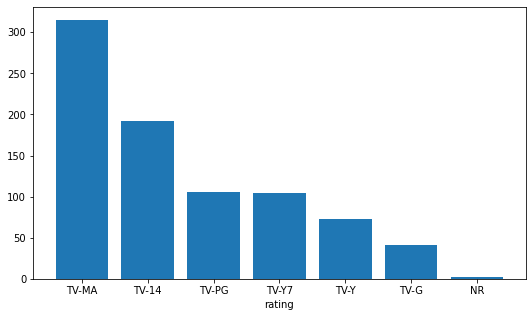

In [58]:
datap=tvshow_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

datap=datap[datap['country']=='United States'].copy()
#datap['director']=datap['director'].str.split(', ')
datap['cast']=datap['cast'].str.split(', ')
datap['listed_in']=datap['listed_in'].str.split(', ')
l=['cast','listed_in']
k=1

for i in l:
    plt.figure(figsize=(30,5))
    plt.subplot(1,3,k)
    plt.bar(x=datap.explode(i)[i].value_counts()[0:7].index,height=datap.explode(i)[i].value_counts()[0:7].values)
    plt.xlabel(i)
    plt.show()
    k+=1
    
plt.figure(figsize=(30,5))
plt.subplot(1,3,3)
plt.bar(x=datap['rating'].value_counts()[0:7].index,height=datap['rating'].value_counts()[0:7].values)
plt.xlabel('rating')
plt.show()

In [59]:
datap=tvshow_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

usa=datap[datap['country']=='United States']

usal,usad,usac=usa.copy(),usa.copy(),usa.copy()
usal['listed_in']=usal['listed_in'].str.split(', ')
usad=data[data['type']=='TV Show'].copy()
usad['country']=usad['country'].str.split(', ')
usad=usad.explode('country')
usad=usad[usad['country']=='United States']
usad['director']=usad['director'].str.split(', ')
usac['cast']=usac['cast'].str.split(', ')

m1d={'list':['director']*5,
     'United States Top 5':usad.explode('director')['director'].value_counts()[0:5].index,
     'count':usad.explode('director')['director'].value_counts()[0:5].values}
m1c={'list':['cast']*5,
     'United States Top 5':usac.explode('cast')['cast'].value_counts()[0:5].index,
     'count':usac.explode('cast')['cast'].value_counts()[0:5].values}
m1g={'list':['genre']*5,
     'United States Top 5':usal.explode('listed_in')['listed_in'].value_counts()[0:5].index,
     'count':usal.explode('listed_in')['listed_in'].value_counts()[0:5].values}
m1r={'list':['rating']*5,
     'United States Top 5':usa['rating'].value_counts()[0:5].index,
     'count':usa['rating'].value_counts()[0:5].values}

dfd,dfc,dfg,dfr=pd.DataFrame(m1d),pd.DataFrame(m1c),pd.DataFrame(m1g),pd.DataFrame(m1r)
df=pd.concat([dfd,dfc,dfg,dfr],axis=0)
k=df.groupby(['list','United States Top 5'],sort=False)
k.first()

count
list     United States Top 5            
director Ken Burns                     3
         Stan Lathan                   2
         Rob Seidenglanz               2
         Joe Berlinger                 2
         Lynn Novick                   2
cast     Vincent Tong                 10
         Grey Griffin                 10
         Kevin Michael Richardson      9
         Kari Wahlgren                 8
         Johnny Yong Bosch             8
genre    TV Comedies                 264
         TV Dramas                   241
         Kids' TV                    227
         Crime TV Shows              107
         TV Action & Adventure        96
rating   TV-MA                       315
         TV-14                       192
         TV-PG                       106
         TV-Y7                       104
         TV-Y                         73

### 2.United Kingdom

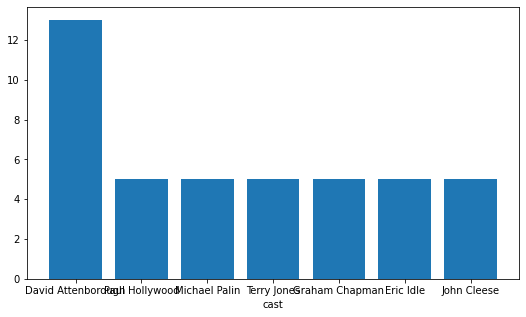

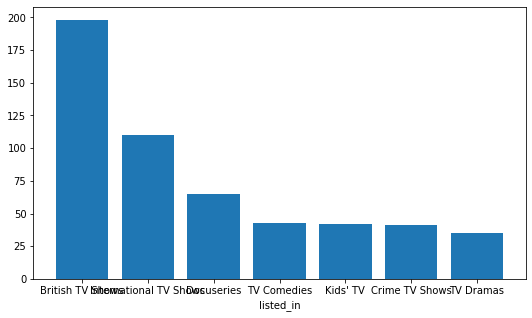

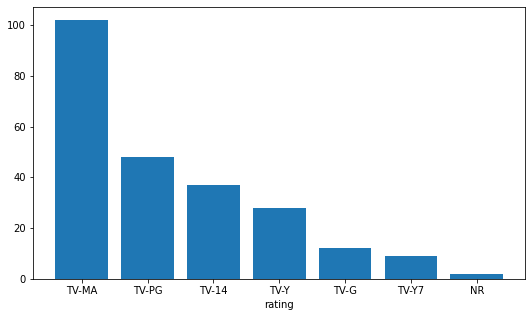

In [60]:
datap=tvshow_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

datap=datap[datap['country']=='United Kingdom'].copy()
#datap['director']=datap['director'].str.split(', ')
datap['cast']=datap['cast'].str.split(', ')
datap['listed_in']=datap['listed_in'].str.split(', ')
l=['cast','listed_in']
k=1

for i in l:
    plt.figure(figsize=(30,5))
    plt.subplot(1,3,k)
    plt.bar(x=datap.explode(i)[i].value_counts()[0:7].index,height=datap.explode(i)[i].value_counts()[0:7].values)
    plt.xlabel(i)
    plt.show()
    k+=1
    
plt.figure(figsize=(30,5))
plt.subplot(1,3,3)
plt.bar(x=datap['rating'].value_counts()[0:7].index,height=datap['rating'].value_counts()[0:7].values)
plt.xlabel('rating')
plt.show()

In [61]:
datap=tvshow_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

usa=datap[datap['country']=='United Kingdom']

usal,usad,usac=usa.copy(),usa.copy(),usa.copy()
usal['listed_in']=usal['listed_in'].str.split(', ')
usad=data[data['type']=='TV Show'].copy()
usad['country']=usad['country'].str.split(', ')
usad=usad.explode('country')
usad=usad[usad['country']=='United Kingdom']
usad['director']=usad['director'].str.split(', ')
usac['cast']=usac['cast'].str.split(', ')

m1d={'list':['director']*5,
     'United Kingdom Top 5':usad.explode('director')['director'].value_counts()[0:5].index,
     'count':usad.explode('director')['director'].value_counts()[0:5].values}
m1c={'list':['cast']*5,
     'United Kingdom Top 5':usac.explode('cast')['cast'].value_counts()[0:5].index,
     'count':usac.explode('cast')['cast'].value_counts()[0:5].values}
m1g={'list':['genre']*5,
     'United Kingdom Top 5':usal.explode('listed_in')['listed_in'].value_counts()[0:5].index,
     'count':usal.explode('listed_in')['listed_in'].value_counts()[0:5].values}
m1r={'list':['rating']*5,
     'United Kingdom Top 5':usa['rating'].value_counts()[0:5].index,
     'count':usa['rating'].value_counts()[0:5].values}

dfd,dfc,dfg,dfr=pd.DataFrame(m1d),pd.DataFrame(m1c),pd.DataFrame(m1g),pd.DataFrame(m1r)
df=pd.concat([dfd,dfc,dfg,dfr],axis=0)
k=df.groupby(['list','United Kingdom Top 5'],sort=False)
k.first()

count
list     United Kingdom Top 5         
director Alastair Fothergill         3
         Andy Devonshire             1
         John Dower                  1
         Mark Tonderai               1
         Michael Samuels             1
cast     David Attenborough         13
         Paul Hollywood              5
         Michael Palin               5
         Terry Jones                 5
         Graham Chapman              5
genre    British TV Shows          198
         International TV Shows    110
         Docuseries                 65
         TV Comedies                43
         Kids' TV                   42
rating   TV-MA                     102
         TV-PG                      48
         TV-14                      37
         TV-Y                       28
         TV-G                       12

### 3.Japan

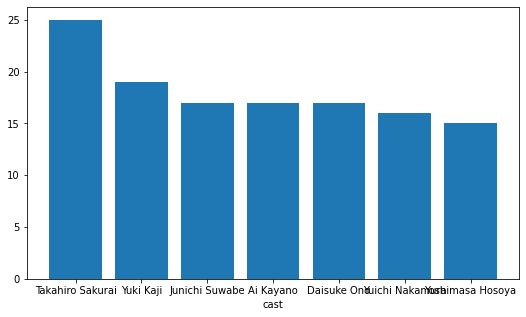

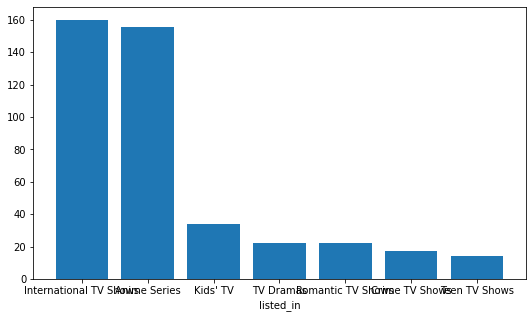

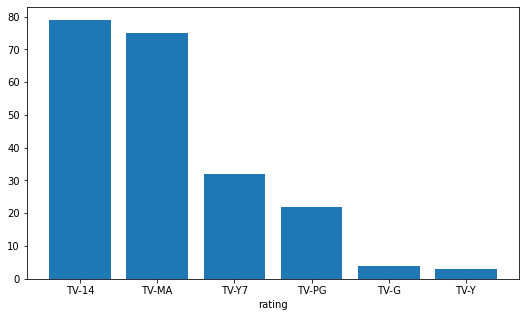

In [62]:
datap=tvshow_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

datap=datap[datap['country']=='Japan'].copy()
#datap['director']=datap['director'].str.split(', ')
datap['cast']=datap['cast'].str.split(', ')
datap['listed_in']=datap['listed_in'].str.split(', ')
l=['cast','listed_in']
k=1

for i in l:
    plt.figure(figsize=(30,5))
    plt.subplot(1,3,k)
    plt.bar(x=datap.explode(i)[i].value_counts()[0:7].index,height=datap.explode(i)[i].value_counts()[0:7].values)
    plt.xlabel(i)
    plt.show()
    k+=1
    
plt.figure(figsize=(30,5))
plt.subplot(1,3,3)
plt.bar(x=datap['rating'].value_counts()[0:7].index,height=datap['rating'].value_counts()[0:7].values)
plt.xlabel('rating')
plt.show()

In [63]:
datap=tvshow_data.copy()
datap['country']=datap['country'].str.split(', ')
datap=datap.explode('country')

usa=datap[datap['country']=='Japan']

usal,usad,usac=usa.copy(),usa.copy(),usa.copy()
usal['listed_in']=usal['listed_in'].str.split(', ')
usad=data[data['type']=='TV Show'].copy()
usad['country']=usad['country'].str.split(', ')
usad=usad.explode('country')
usad=usad[usad['country']=='Japan']
usad['director']=usad['director'].str.split(', ')
usac['cast']=usac['cast'].str.split(', ')

m1d={'list':['director']*5,
     'Japan Top 5':usad.explode('director')['director'].value_counts()[0:5].index,
     'count':usad.explode('director')['director'].value_counts()[0:5].values}
m1c={'list':['cast']*5,
     'Japan Top 5':usac.explode('cast')['cast'].value_counts()[0:5].index,
     'count':usac.explode('cast')['cast'].value_counts()[0:5].values}
m1g={'list':['genre']*5,
     'Japan Top 5':usal.explode('listed_in')['listed_in'].value_counts()[0:5].index,
     'count':usal.explode('listed_in')['listed_in'].value_counts()[0:5].values}
m1r={'list':['rating']*5,
     'Japan Top 5':usa['rating'].value_counts()[0:5].index,
     'count':usa['rating'].value_counts()[0:5].values}

dfd,dfc,dfg,dfr=pd.DataFrame(m1d),pd.DataFrame(m1c),pd.DataFrame(m1g),pd.DataFrame(m1r)
df=pd.concat([dfd,dfc,dfg,dfr],axis=0)
k=df.groupby(['list','Japan Top 5'],sort=False)
k.first()

count
list     Japan Top 5                  
director Chiaki Kon                  1
         Takuya Igarashi             1
         Go Koga                     1
         Yasuhiro Irie               1
         Masaaki Yuasa               1
cast     Takahiro Sakurai           25
         Yuki Kaji                  19
         Junichi Suwabe             17
         Ai Kayano                  17
         Daisuke Ono                17
genre    International TV Shows    160
         Anime Series              156
         Kids' TV                   34
         TV Dramas                  22
         Romantic TV Shows          22
rating   TV-14                      79
         TV-MA                      75
         TV-Y7                      32
         TV-PG                      22
         TV-G                        4